In [10]:
import matplotlib.pyplot as plt
import matplotlib

plt.rc("font", family="malgun gothic")
matplotlib.rcParams["axes.unicode_minus"]=False
%config InlineBackend.figure_format="retina"

import numpy as np

In [33]:
# Q1 : 캘리포니아 집값에 대하여 회귀 분석을 하고 평가를 수행해 보세요.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# step 1. 데이터 준비
housing = fetch_california_housing()
x = housing["data"]   # 독립 변수
y = housing["target"] # 종속 변수(집값)


# step 2. 학습 데이터와 검증 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# step 3. 모델 생성
model = LinearRegression()

# step 4. 학습
model.fit(x_train, y_train)

# step 5. 평가
print(model.score(x_test, y_test))
y

0.5910509795491352


array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

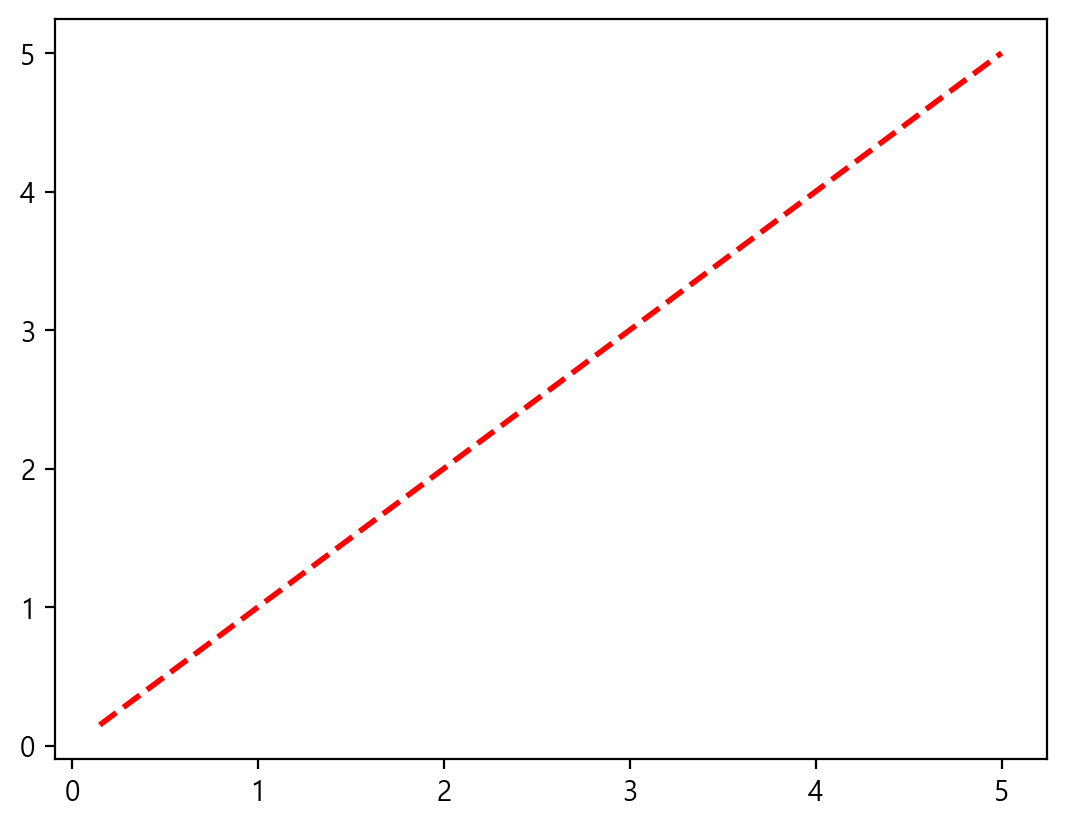

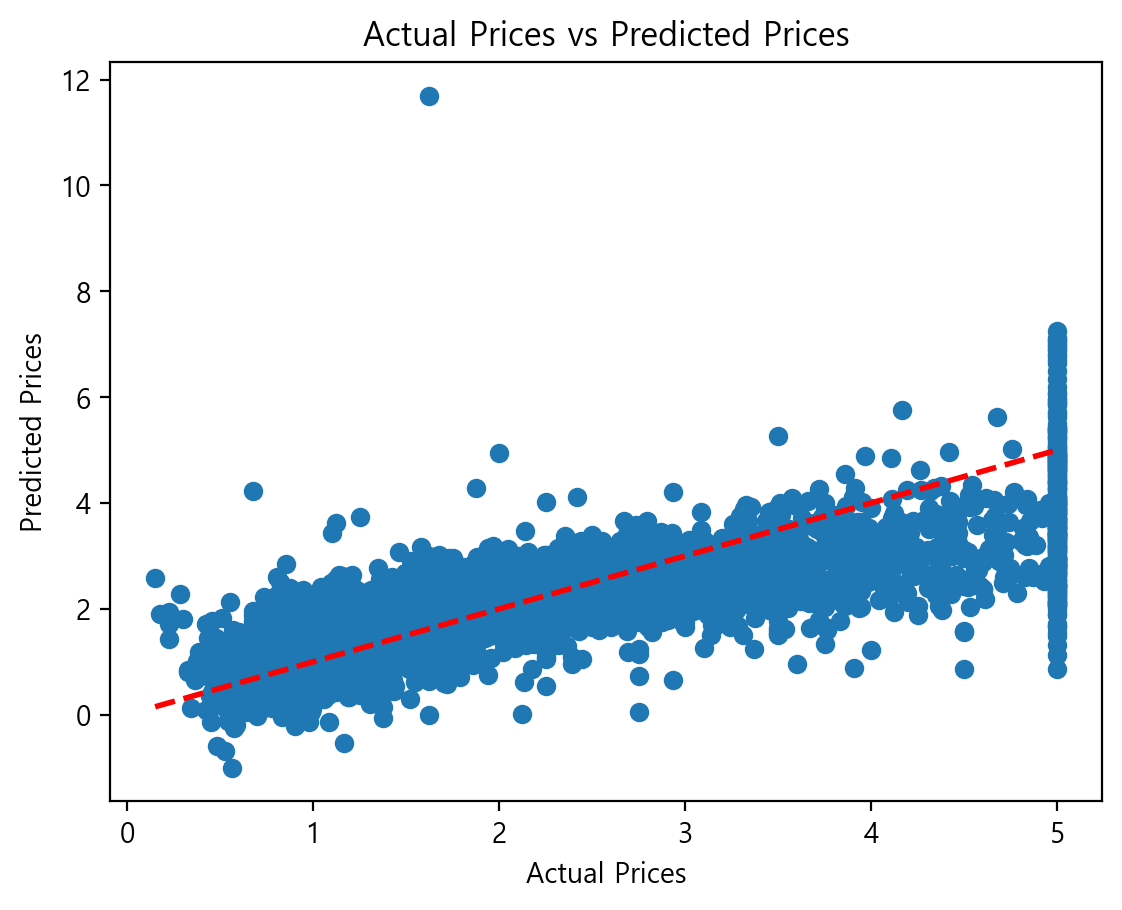

In [36]:
y_pred = model.predict(x_test)

# 산점도 그리기
plt.scatter(y_test, y_pred)
#plt.plot(x,y_pred,color='orange',label='predict')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [37]:
# Q1 : 캘리포니아 집값에 대하여 회귀 분석을 하고 평가를 수행해 보세요.

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# step 1. 데이터 준비
housing = fetch_california_housing()
x = housing["data"]   # 독립 변수
y = housing["target"] # 종속 변수(집값)


# step 2. 학습 데이터와 검증 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


pf = PolynomialFeatures(degree=2)
x_ploy_train = pf.fit_transform(x_train) #다항 특성으로 적용하고 학습을 시키겠다
x_ploy_test = pf.fit_transform(x_test)#다항 특성으로 적용만 하겠다



# step 3. 모델 생성
model = LinearRegression()

# step 4. 학습
model.fit(x_ploy_train, y_train)

# step 5. 평가(예측 계산, mean_squared_error 계산 후 출력!!)
y_pred = model.predict(x_ploy_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error: ",rmse)


Root Mean Squared Error:  0.6743806661711929


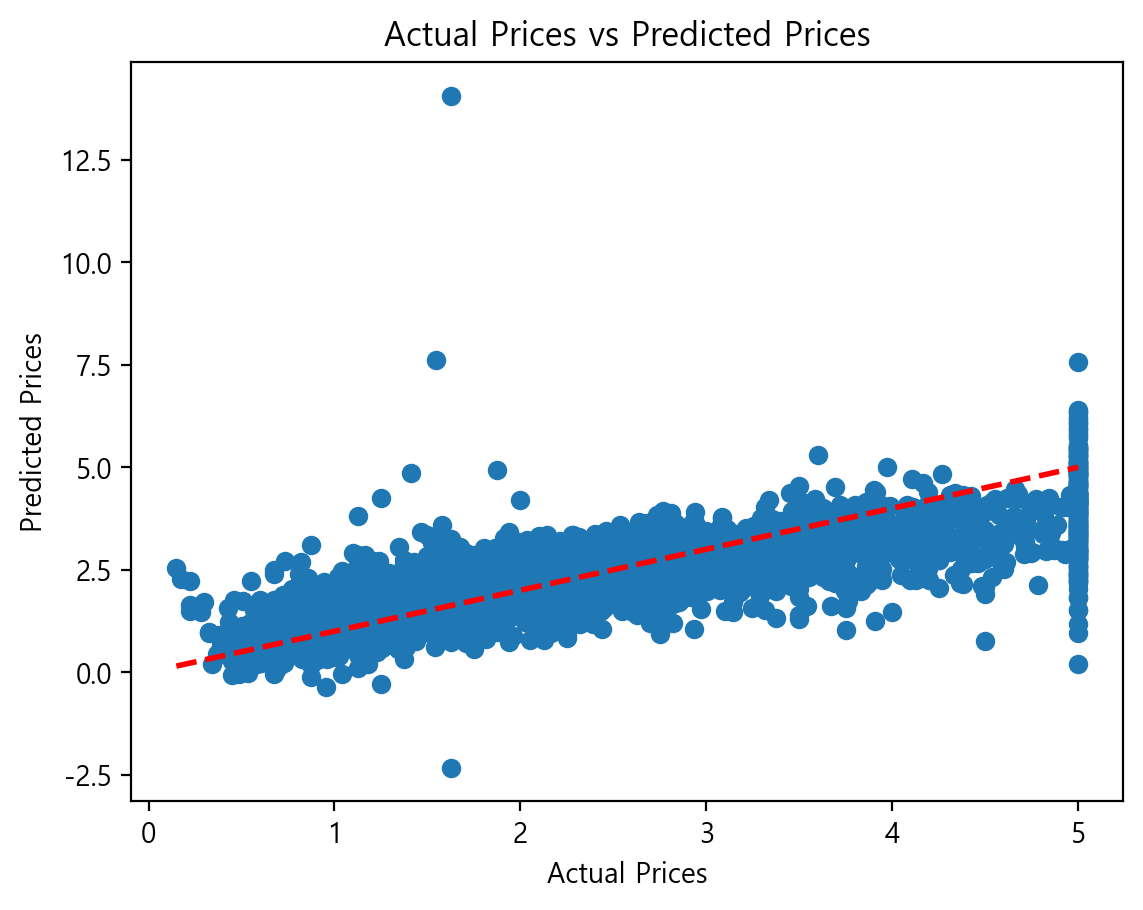

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# 대각선 추가 (예측 값과 실제 값이 같은 경우)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()

### 특성값 조절 -> 모델 파라미터 조정 -> 모델 변경 -> 데이터 스케일링(표준화 , 정규화) -> 교차 검증 -> 정규화 작용(Ridge , Lasso)

In [4]:
from sklearn.utils import all_estimators

best_res =  all_estimators(type_filter="classifier")  #사이킷런에서 제공하는 모든 분류모델을 리턴
k = KFold(n_splits=5, shuffle=True, random_state=30) # 검증 

for(name,estimator) in best_res: #(모델의 이름, 모델클래스)
    try:
        clf  = estimator()  # 모델생성
        if hasattr(clf,'score') : # 분류 모델에 'score'라는 속성이 존재 한다면  
             scores=cross_val_score(clf, x, y, cv=k) #교차검증 하자  
        #print(name) #모형, 모델의 이름 
        #print(scores) #점수
        print(f'{name} : 평균 정확도 = {scores.mean():.2f},표준편차 ={scores.std():.2f}')
    except Exception:
        pass

NameError: name 'KFold' is not defined